# Introduction 
Churn prediction systems help companies identify customers who are likely to leave by analyzing their behavior. This information allows marketing teams to develop strategies to retain these customers, which in turn increases the overall value of each customer's lifetime and contributes to the company's market growth.

# Problem Statement
To minimize customer loss for a bank using customer churn prediction (CCP), the focus is on identifying customers who do not update their account details when their debit or credit card expires. Losing customers can be expensive for a bank, so by detecting those who are likely to close their accounts or switch to a competitor early on, the bank can take proactive measures to retain valuable clients and allocate resources more efficiently. This approach aims to reduce customer churn, maintain customer loyalty, and enhance the bank's overall performance.

# Machine learning problem
Binary classification problem for which we are employing machine learning approaches to predict which customers of a bank will churn based on their individual account features.

# Data
##### variables

It consists of 10000 observations and 12 variables.
Independent variables contain information about customers.
Dependent variable refers to customer abandonment
- input:

- customer_id : Account Number
- credit_score : Credit Score
- country : Country of Residence
- gender : Gender
- age : Age
- tenure : From how many years he/she is having bank acc in ABC Bank.
- balance : Account Balance.
- products_number : Number of Product from bank.
- credit_card : Is this customer have credit card ?
- active_member : Is he/she is active Member of bank ?
- estimated_salary : Salary of Account holder.
#### output:
- churn, used as the target.
1 if the client has left the bank during some period or 0 if he/she has not.

In [105]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [106]:
#importing csv file(dataset)
df=pd.read_csv('Bank Customer Churn Prediction (1).csv')


In [107]:
#showing no of attributes in dataset
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [108]:
#showing all the attributes in dataset
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [109]:
#showing how many records are present in dataset
df.shape

(10000, 12)

In [110]:
# showing datatype of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


 - There are 10000 rows and 12 columns in te dataset 
 - Gender and Country are of object type and all other attributes are of integer or float type 

In [111]:
# missing value
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [112]:
# Duplicate value 
df.duplicated().sum()

0

- Their is no missing value and Duplicate values in the dataset 

In [113]:
# Dispcription of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


-The dataset consists of information for 10,000 customers, including their customer ID, credit score, age, tenure, balance, number of products, credit card usage, active member status, estimated salary, and churn status. The customers' IDs range from 15,565,701 to 15,815,690. The average credit score is around 650.53, and the average age is approximately 38.92 years. On average, customers have a tenure of 5.01 years and a balance of about 76,858.89. The mean number of products per customer is 1.53, with a majority of customers using their credit cards (mean credit card usage of 0.705) and being active members (mean proportion of active members is 0.515). The estimated salary has an average of approximately 100,090.2, and the churn rate indicates that around 20.37% of customers have churned. Overall, the dataset provides insights into customer demographics, financial behavior, and churn patterns.

In [114]:
df['credit_score'].nunique()

460

In [115]:
# Searching for Top 5 Customer whose bank Balance is high
df_top_balance=df.sort_values(by='balance',ascending=False)
df_top_balance.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2092,15757408,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,15715622,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
8733,15714241,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
3588,15571958,489,Spain,Male,40,3,221532.80,1,1,0,171867.08,0
6717,15586674,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1


In [116]:
#Searching for bottom 5 customer whose balance is less
df_least_balance=df.sort_values(by='balance',ascending=True)
df_least_balance.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
5148,15812767,731,Spain,Male,70,3,0.0,2,1,1,141180.66,0
5143,15670584,646,Spain,Male,31,2,0.0,1,1,1,170821.43,1
5142,15778526,719,Spain,Female,48,5,0.0,2,0,0,78563.66,0
5141,15662500,774,Spain,Male,32,9,0.0,2,1,0,10604.48,0


In [117]:
# Finding all the unique values in dataset
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [118]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [119]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [120]:
df['balance'].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

In [121]:
#droping the attribute
df.drop(['customer_id'],axis=1,inplace=True)

In [122]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Univerate Analysis

Text(0.5, 1.0, 'Churn')

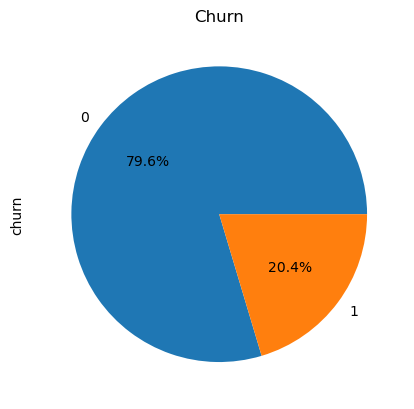

In [123]:
data=df['churn'].value_counts()
data.plot(kind='pie',autopct='%0.1f%%');
plt.title('Churn')


- In the ablove table we can observe that 1 represent the customer who are closing the bank account and 0 represent the customer who are still having the bank account

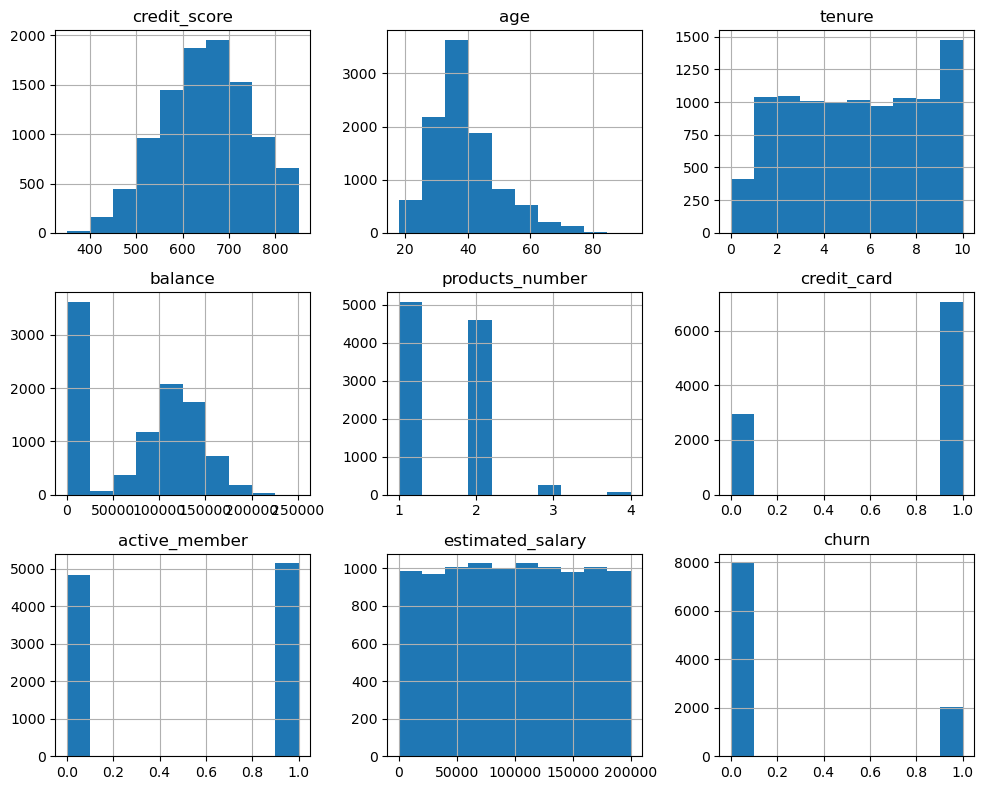

In [124]:
df.hist(figsize=(10,8));
plt.tight_layout()



Text(0.5, 1.0, 'Based on Gender')

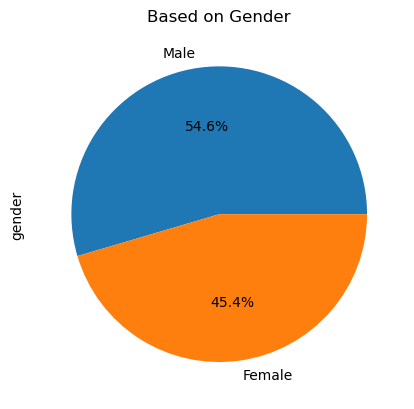

In [125]:
data=df['gender'].value_counts()
data.plot(kind='pie',autopct='%0.1f%%');
plt.title('Based on Gender')

- Compare to female, male are having more number of bank account

<Figure size 200x500 with 0 Axes>

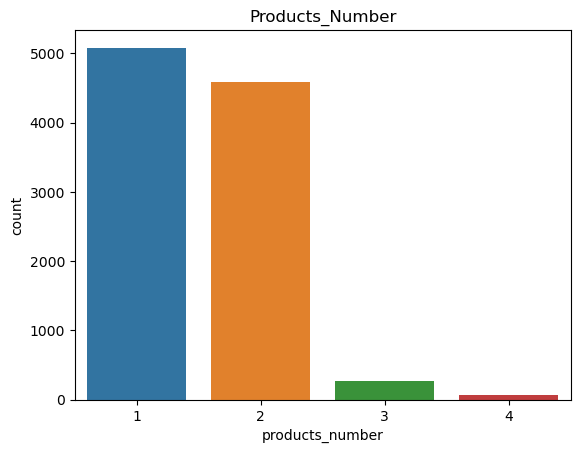

<Figure size 200x500 with 0 Axes>

In [126]:
sns.countplot('products_number',data=df);
plt.title('Products_Number')
plt.figure(figsize=(2,5))

- Many customer use product one and two than product three and four

Text(0.5, 1.0, 'Credit_Card')

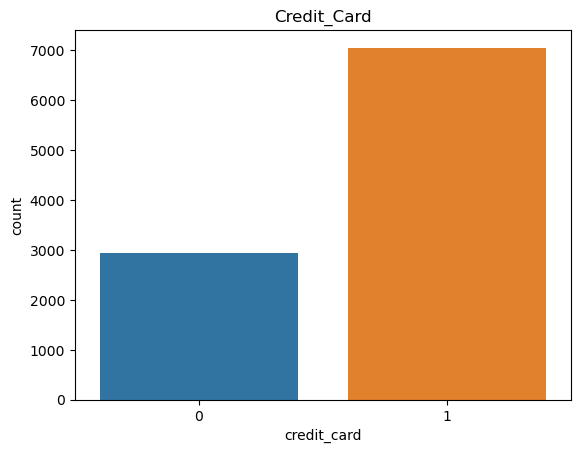

In [127]:
sns.countplot('credit_card',data=df);
plt.title('Credit_Card')

- Here we can see that most of the customer own the credit card

Text(0.5, 1.0, 'Based on Country')

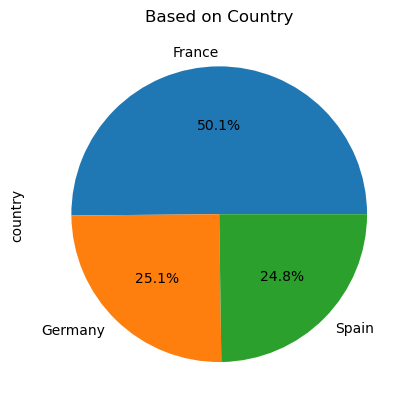

In [128]:
data=df['country'].value_counts()
data.plot(kind='pie',autopct='%0.1f%%');
plt.title('Based on Country')

- Here we can see that more number of customer are from France than Spain and Germany

# Biveriate Analysis

In [129]:
by_country = df.groupby(['country'])['churn'].value_counts(normalize=True).to_frame().rename(columns
        ={'churn': 'ratio'}).reset_index().sort_values('country')
by_country

,country,churn,ratio
0,France,0,0.838452
1,France,1,0.161548
2,Germany,0,0.675568
3,Germany,1,0.324432
4,Spain,0,0.833266
5,Spain,1,0.166734


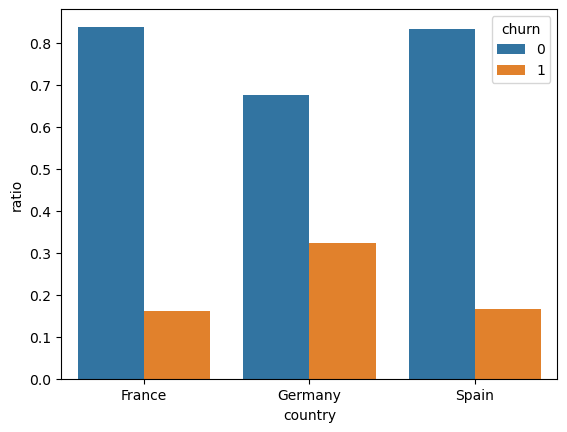

In [130]:
sns.barplot(x='country',y='ratio',hue='churn',data=by_country);

- In the above table we can see than Germany country has highest churn rate compare to other two countries

In [131]:
by_gender= df.groupby(['gender'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('gender')
by_gender

,gender,churn,ratio
0,Female,0,0.749285
1,Female,1,0.250715
2,Male,0,0.835441
3,Male,1,0.164559


<AxesSubplot:xlabel='gender', ylabel='ratio'>

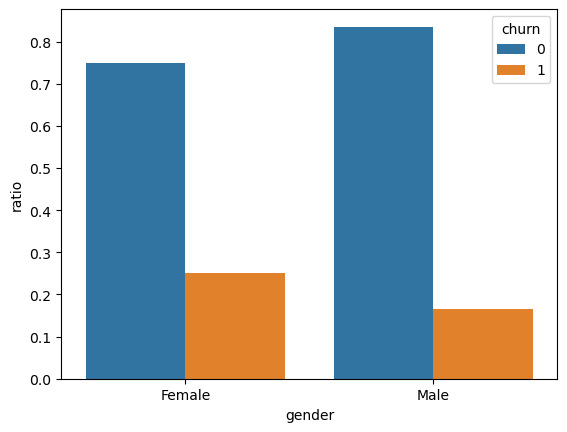

In [132]:
sns.barplot(x='gender',y='ratio',hue='churn',data=by_gender)

- In this plot it shows the comparision b/w Male and Female where Female are churn more compare to Male

In [133]:
by_country_gender=df.groupby(['country','gender'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('country')
by_country_gender

,country,gender,churn,ratio
0,France,Female,0,0.796550
1,France,Female,1,0.203450
2,France,Male,0,0.872866
3,France,Male,1,0.127134
4,Germany,Female,0,0.624476
5,Germany,Female,1,0.375524
6,Germany,Male,0,0.721884
7,Germany,Male,1,0.278116
8,Spain,Female,0,0.787879
9,Spain,Female,1,0.212121


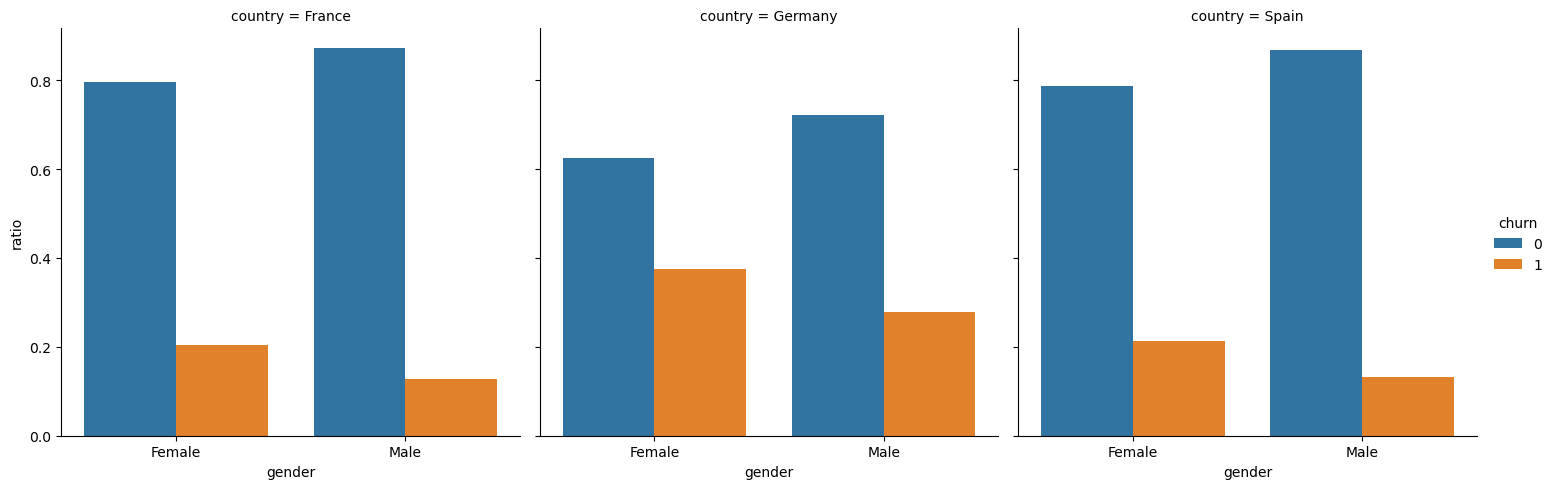

In [134]:
sns.catplot(x='gender',y='ratio', hue='churn', col='country', kind='bar', data=by_country_gender)

- This plot help us to analyse that Germany has more churn compare other two countries. In Germany Female are churing more than male

Text(0.5, 1.0, 'Age')

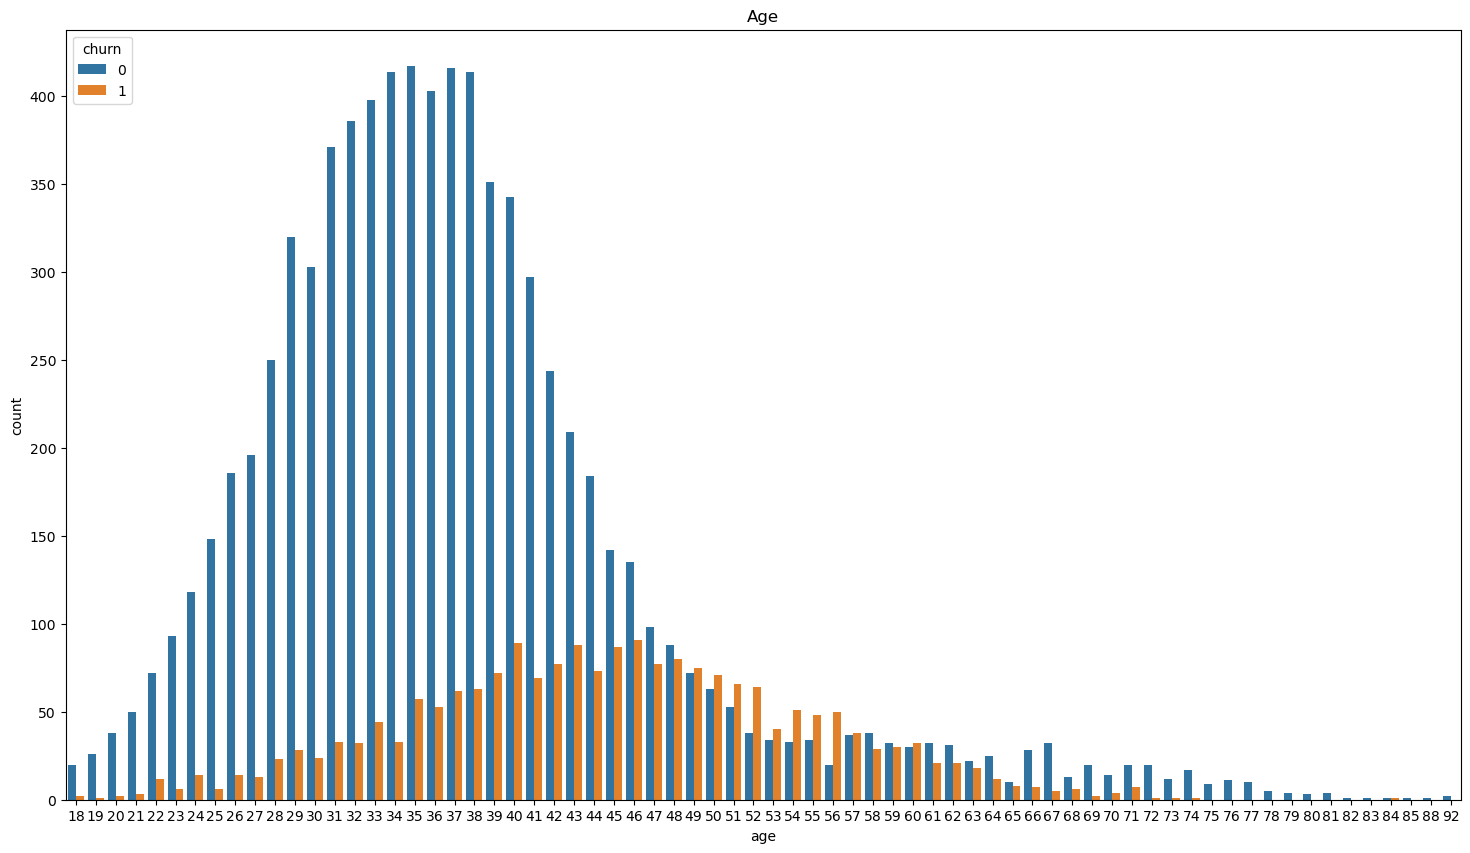

In [31]:
plt.figure(figsize = (18, 10))

sns.countplot(x = 'age', hue = 'churn' , data = df)
plt.title('Age')


- The most of customers are churn when thier ages are between 38 to 50 years old.The most of customers are non-churn and have accounts in the bank that thier ages are between 25 to 40 years old

Text(0.5, 1.0, 'Blanace based on Churn')

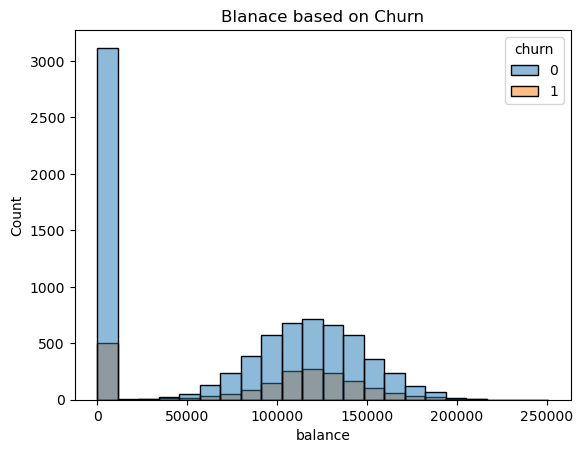

In [32]:
sns.histplot(x='balance',hue='churn',data=df)
plt.title('Blanace based on Churn')

- Balance of the churn customers range b/w 50000 to 200000 and even we can see that many customer who is active and inactive have their bank balance is Zero.

In [33]:
by_active_member=df.groupby(['active_member'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('active_member')
by_active_member

,active_member,churn,ratio
0,0,0,0.731491
1,0,1,0.268509
2,1,0,0.857309
3,1,1,0.142691


<AxesSubplot:xlabel='active_member', ylabel='ratio'>

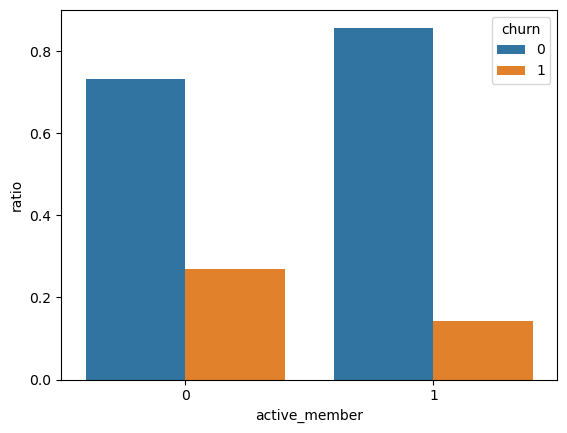

In [34]:
sns.barplot(x='active_member',y='ratio',hue='churn',data=by_active_member)

In [35]:
by_products_number = df.groupby(['products_number','country'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('products_number')
by_products_number

,products_number,country,churn,ratio
0,1,France,0,0.775656
1,1,France,1,0.224344
2,1,Germany,0,0.571534
3,1,Germany,1,0.428466
4,1,Spain,0,0.781327
5,1,Spain,1,0.218673
11,2,Spain,1,0.073542
9,2,Germany,1,0.121154
10,2,Spain,0,0.926458
7,2,France,1,0.057034


- The customer who try to churn has used upto 4 products 

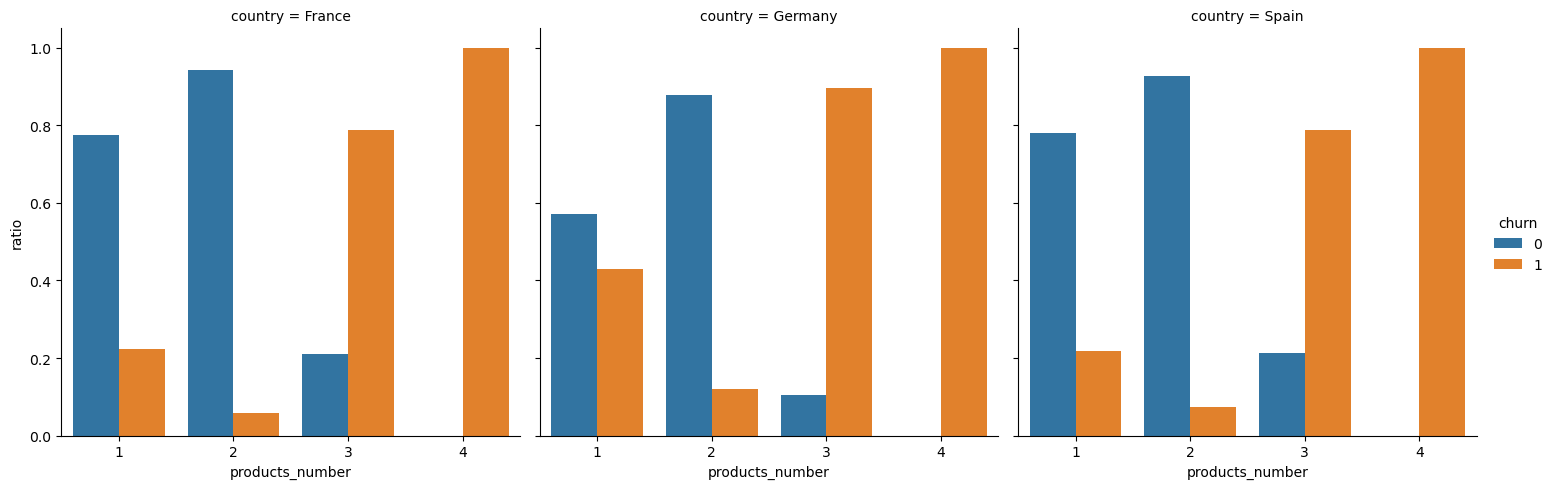

In [37]:
sns.catplot(x='products_number', hue='churn',y='ratio', col='country', kind='bar', data=by_products_number)

- Here we can see that all the three countries churn customers have brought four number of products

<AxesSubplot:xlabel='tenure', ylabel='gender'>

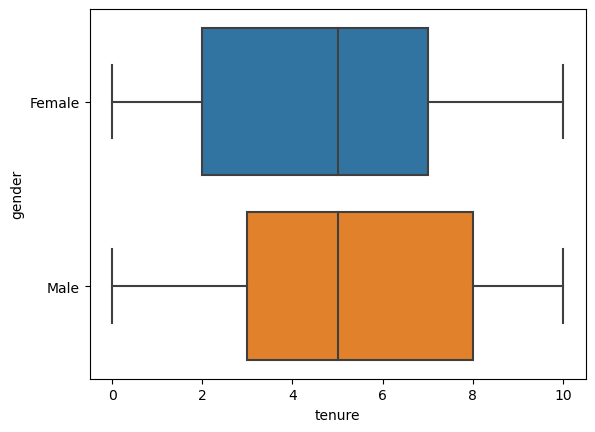

In [38]:
sns.boxplot(x='tenure',y='gender',data=df)

In [39]:
by_tenure=df.groupby(['tenure'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('tenure')
by_tenure

,tenure,churn,ratio
0,0,0,0.769976
1,0,1,0.230024
2,1,0,0.775845
3,1,1,0.224155
4,2,0,0.808206
5,2,1,0.191794
6,3,0,0.788900
7,3,1,0.211100
8,4,0,0.794742
9,4,1,0.205258


<AxesSubplot:xlabel='tenure', ylabel='count'>

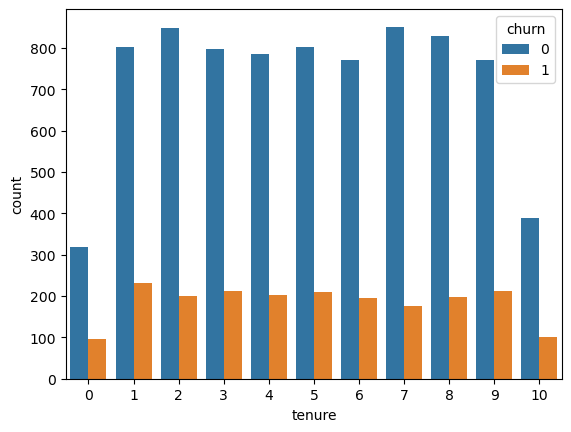

In [40]:
sns.countplot('tenure',hue='churn',data=df)

- Here it shows that for how many the customer are active in the bank 

<AxesSubplot:xlabel='credit_card', ylabel='count'>

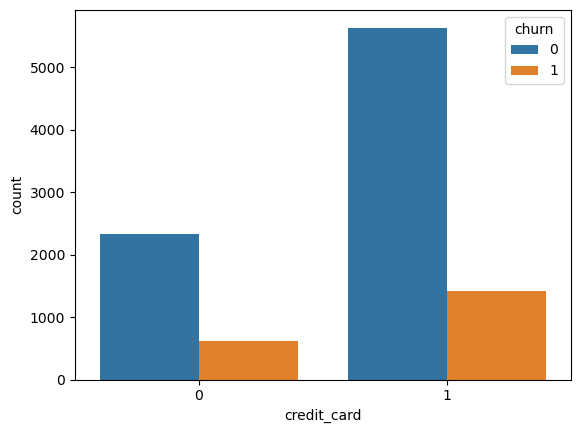

In [41]:
sns.countplot(x='credit_card',hue='churn',data=df)

- The possibility that customers are churn when they have a credit card of that Bank and vice versa.May be because credit card influences your spending habits in a negative way

<AxesSubplot:xlabel='credit_score', ylabel='balance'>

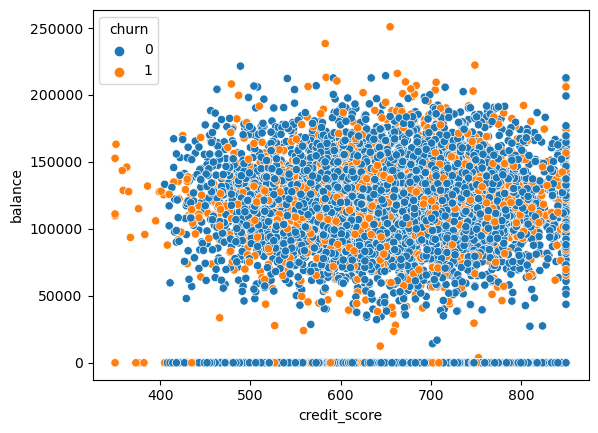

In [42]:
sns.scatterplot(x="credit_score", y="balance", data=df, hue = "churn")

- Here most of the customer have churn when their credit score is between 450 to 800 and whose bank balance is having less than 200000

<AxesSubplot:xlabel='gender', ylabel='estimated_salary'>

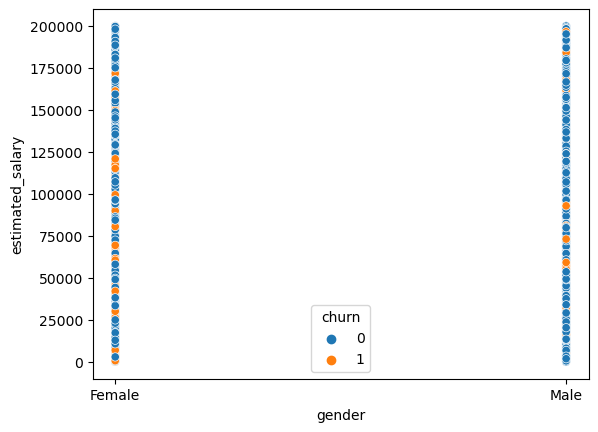

In [43]:
sns.scatterplot(x = "gender",y = "estimated_salary",data = df,hue = "churn")

# Outliers 

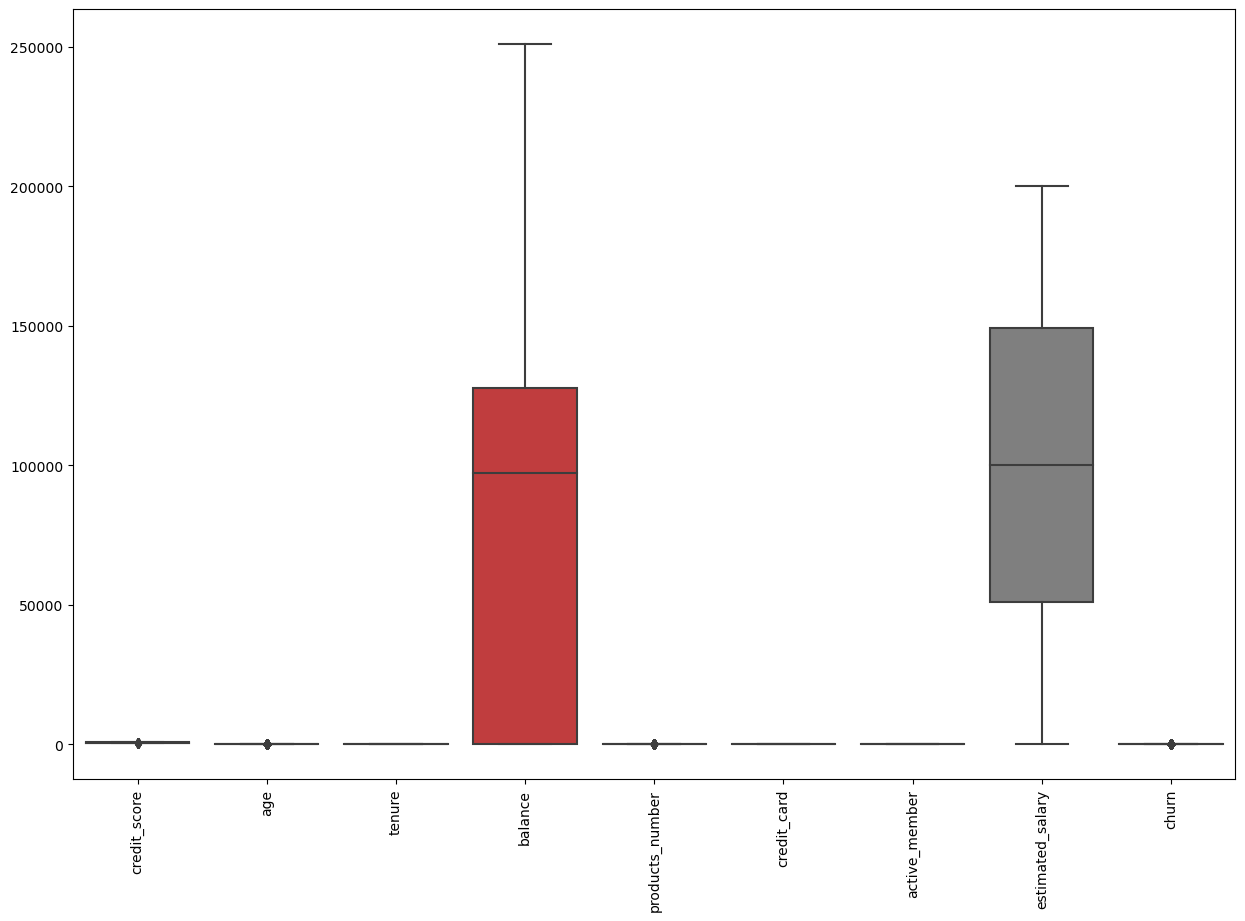

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df);
plt.xticks(rotation=90);

- Here we can observe that credit_score, age, product_number are having outliers. 

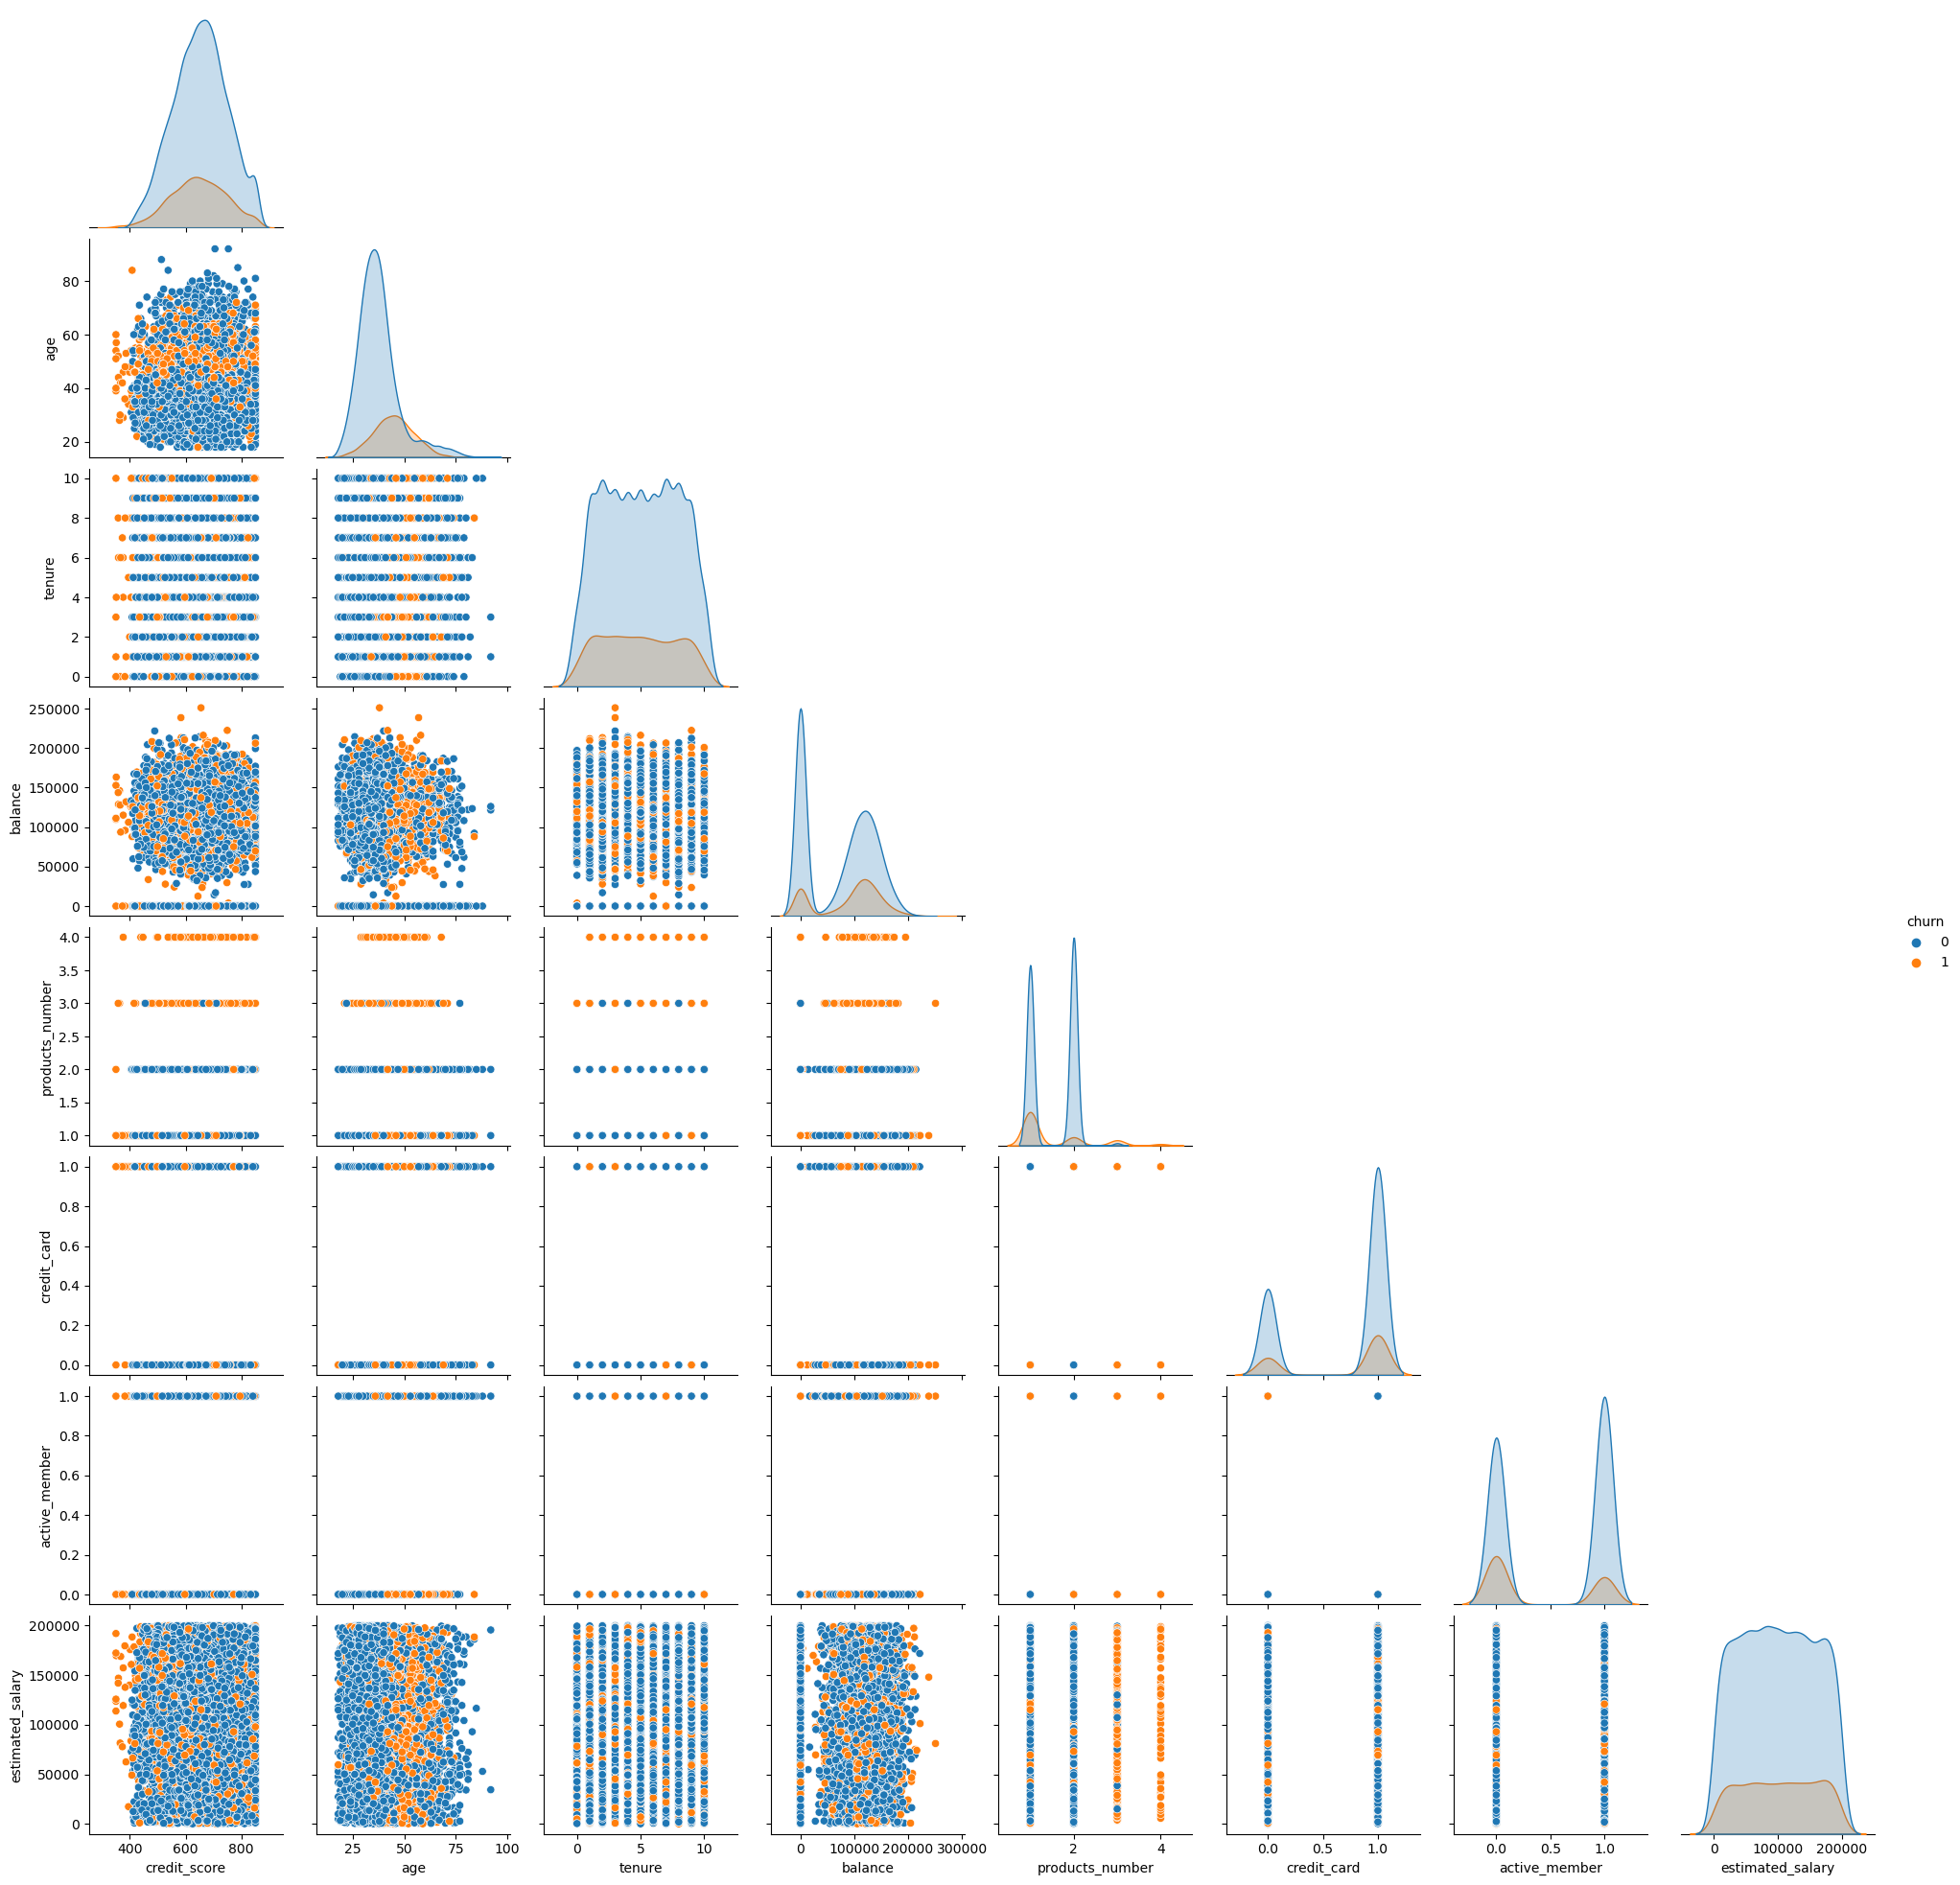

In [45]:
sns.pairplot(df,corner=True,hue='churn')

<AxesSubplot:>

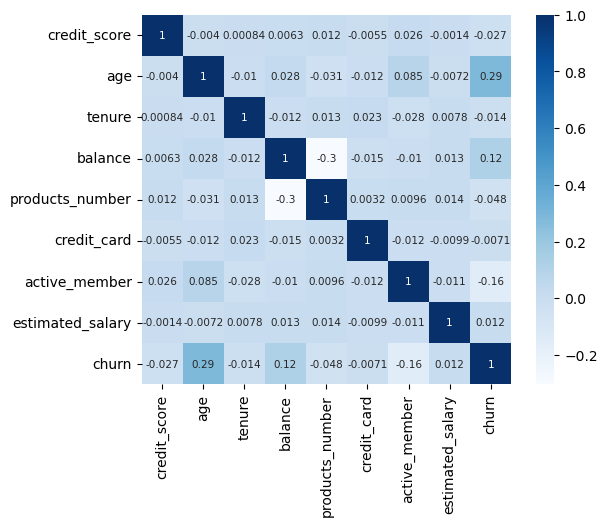

In [46]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 7.5}, cmap='Blues', square=True)

- Through the correlation matrix, we can see that age has the highest correlation with churn, with 0.29. The variable balance is also of interest, with a 0.12 correlation with churn. So older customers and those with higher balances are more likely to churn.

In [47]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Label Encoding

In [48]:
df['country']=df['country'].replace({1:'France',2:'Spain',3:'Germany'})

In [49]:
df=pd.get_dummies(df,columns=['country'],drop_first=True)

In [50]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [51]:
df['gender']=pd.Categorical(df['gender']).codes
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


# Data scaling 

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
std_scale=StandardScaler()
std_scale

StandardScaler()

In [54]:
df_std=df.copy()
df_std

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0


In [55]:
df_std['age']=std_scale.fit_transform(df_std[['age']])
df_std['balance']=std_scale.fit_transform(df_std[['balance']])
df_std['estimated_salary']=std_scale.fit_transform(df_std[['estimated_salary']])
df_std['credit_score']=std_scale.fit_transform(df_std[['credit_score']])

In [56]:
df_std.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,-0.326221,0,0.293517,2,-1.225848,1,1,1,0.021886,1,0,0
1,-0.440036,0,0.198164,1,0.117350,1,0,1,0.216534,0,0,1
2,-1.536794,0,0.293517,8,1.333053,3,1,0,0.240687,1,0,0
3,0.501521,0,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,0
4,2.063884,0,0.388871,2,0.785728,1,1,1,-0.365276,0,0,1


# Train and Test split

In [57]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [58]:
df1=df.copy()

In [59]:
# Copy all the predictor variables into X dataframe
x=df1.drop('churn',axis=1)

# Copy target into the y dataframe. 
y=df1['churn']

In [60]:
x.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [61]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [62]:
# splitting x and y into train and test set 70:30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1,stratify=y)

In [63]:
y_train.value_counts(normalize=True)

0    0.796286
1    0.203714
Name: churn, dtype: float64

In [64]:
y_test.value_counts(normalize=True)

0    0.796333
1    0.203667
Name: churn, dtype: float64

# Model Building

### Logistic Regression 

In [65]:
#import logistics libary
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [66]:
#Fit logistic model
model=LogisticRegression(verbose=True)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=True)

### Predicting on Training and Testing data

In [67]:
y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test)

#### Prediction on Probability 

In [68]:
y_train_predict_prob=model.predict_proba(x_train)
y_test_predict_prob=model.predict_proba(x_test)

# Model Evaluation

In [69]:
#accuracy on Train Data
model.score(x_train,y_train)

0.789

In [70]:
#accuracy on Test Data
model.score(x_test,y_test)

0.792

AUC Train 0.6701275607899027


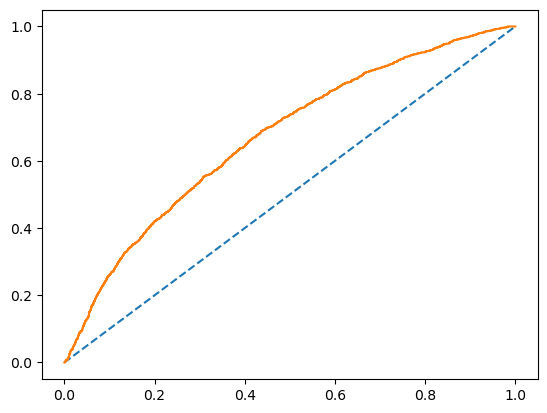

In [71]:
# AUC and ROC for Training Dataset
# predict probabilities
probs=model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC
auc=roc_auc_score(y_train,probs)
print('AUC Train {}'.format(auc))
# calculate roc curve
train_FPR,train_TPR,threshold=roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
# plot the roc curve for the model
plt.plot(train_FPR,train_TPR)

AUC Test 0.6712215493954493


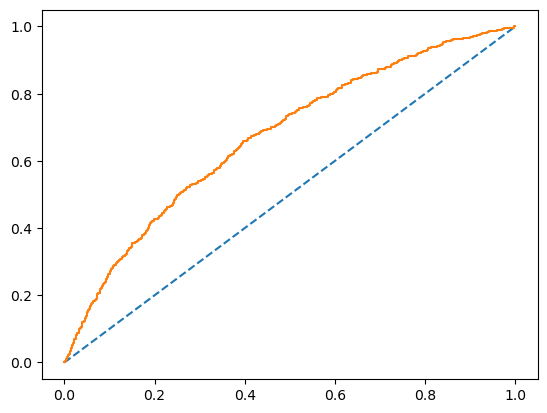

In [72]:
# predict probabilities
probs=model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC
auc=roc_auc_score(y_test,probs)
print('AUC Test {}'.format(auc))
# calculate roc curve
test_FPR,test_TPR,threshold=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
# plot the roc curve for the model
plt.plot(test_FPR,test_TPR)

# Confusion Matrix

In [73]:
confusion_matrix(y_train,y_train_predict)

array([[5443,  131],
       [1346,   80]], dtype=int64)

<AxesSubplot:>

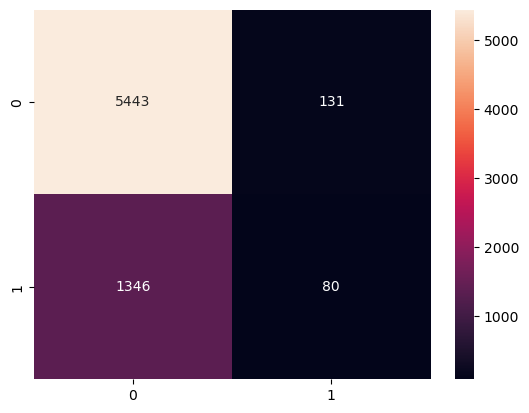

In [74]:
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True,fmt='g')


In [75]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5574
           1       0.38      0.06      0.10      1426

    accuracy                           0.79      7000
   macro avg       0.59      0.52      0.49      7000
weighted avg       0.72      0.79      0.72      7000



In [76]:
confusion_matrix(y_test,y_test_predict)

array([[2344,   45],
       [ 579,   32]], dtype=int64)

<AxesSubplot:>

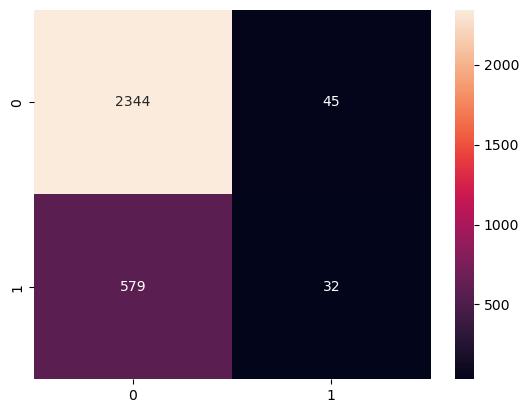

In [77]:
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True,fmt='g')

In [78]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2389
           1       0.42      0.05      0.09       611

    accuracy                           0.79      3000
   macro avg       0.61      0.52      0.49      3000
weighted avg       0.72      0.79      0.72      3000



- Here the model performs well in predicting non-churn cases but struggles to accurately identify churn cases. The precision and recall for churn are relatively low, indicating a high number of false positives and false negatives. Further improvements may be necessary to enhance the model's ability to predict churn accurately.






# Applying GridSearchCV

In [79]:
grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear'],
    'tol': [0.0001],
    'C': [1.0,0.10,0.10],  # Inverse of regularization strength
    'max_iter': [210,350,670],  # Maximum number of iterations for convergence
    'class_weight': [None, 'balanced'],  # Weights associated with each class
    'random_state': [42,97,123] # Random seed for reproducibility
}


In [80]:
model=LogisticRegression(max_iter=10000)
grid_search=GridSearchCV(estimator=model,param_grid=grid,cv=3,scoring='recall',n_jobs=-1)


In [81]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': [1.0, 0.1, 0.1],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [210, 350, 670],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [42, 97, 123],
                         'solver': ['lbfgs', 'liblinear'], 'tol': [0.0001]},
             scoring='recall')

In [82]:
grid_search.best_params_

{'C': 1.0,
 'class_weight': 'balanced',
 'max_iter': 210,
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001}

In [83]:
best_model=grid_search.best_estimator_

In [84]:
best_model.score(x_train,y_train)

0.7138571428571429

In [85]:
best_model.score(x_test,y_test)

0.7133333333333334

In [86]:
y_train_predict=best_model.predict(x_train)
y_test_predict=best_model.predict(x_test)

In [87]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      5574
           1       0.39      0.70      0.50      1426

    accuracy                           0.71      7000
   macro avg       0.64      0.71      0.65      7000
weighted avg       0.80      0.71      0.74      7000



In [88]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      2389
           1       0.39      0.71      0.50       611

    accuracy                           0.71      3000
   macro avg       0.65      0.71      0.65      3000
weighted avg       0.80      0.71      0.74      3000



- The model achieved an accuracy of 71% on both sets. The precision for predicting churn (class 1) is 39%, indicating that the model identifies churn cases with moderate precision. The recall for churn is relatively higher, with 70% on the training set and 71% on the test set, suggesting the model captures a good proportion of actual churn cases. Overall, the model performs reasonably well in identifying churn, although there is room for improvement in precision.

AUC Test 0.7743969735811778


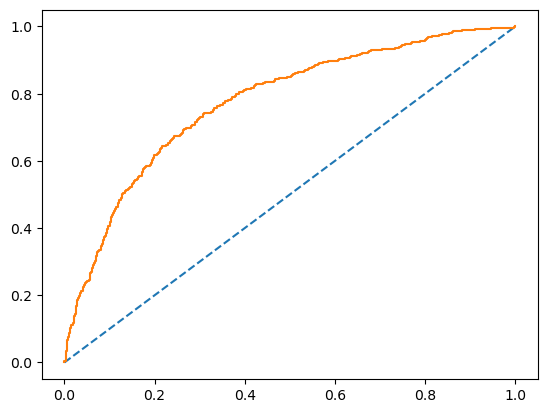

In [89]:
# predict probabilities
probs=best_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC
auc=roc_auc_score(y_test,probs)
print('AUC Test {}'.format(auc))
# calculate roc curve
test_FPR,test_TPR,threshold=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
# plot the roc curve for the model
plt.plot(test_FPR,test_TPR)

- After class_weight Balanced we can see that Auc and Roc curve has slightly imporoved with the score of 0.77%

# Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=1888,class_weight='balanced',max_depth=4,min_samples_leaf=30,
                                       min_samples_split=1000)
decision_tree.fit(x_train, y_train)

y_predict_test = decision_tree.predict(x_test)
y_predict_train = decision_tree.predict(x_train)

In [91]:
print('Decision Tree')
print(classification_report(y_train,y_predict_train))

Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.76      0.84      5574
           1       0.45      0.75      0.56      1426

    accuracy                           0.76      7000
   macro avg       0.69      0.76      0.70      7000
weighted avg       0.83      0.76      0.78      7000



In [92]:
print("Decision Tree")
print(classification_report(y_test, y_predict_test))

Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2389
           1       0.43      0.73      0.54       611

    accuracy                           0.75      3000
   macro avg       0.67      0.74      0.69      3000
weighted avg       0.82      0.75      0.77      3000



- The Decision Tree model on both the training and test sets shows an accuracy of 76% and 75% respectively. The model demonstrates a higher recall for churn (class 1) compared to the Logistic Regression model, with 75% on the training set and 73% on the test set. However, the precision for churn is relatively lower at 45% on the training set and 43% on the test set. Overall, the Decision Tree model performs better than the Logistic Regression model in terms of recall but has room for improvement in precision.

# Random Forest 

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
random_forest = RandomForestClassifier(random_state=2023,class_weight='balanced',max_depth=4,min_samples_leaf=20,
                                       min_samples_split=1000)
random_forest.fit(x_train, y_train)

y_predict_test = random_forest.predict(x_test)
y_predict_train = random_forest.predict(x_train)

In [95]:
# Random Forest
print("Random Forest Model")
print(classification_report(y_train, y_predict_train))

Random Forest Model
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      5574
           1       0.45      0.76      0.56      1426

    accuracy                           0.76      7000
   macro avg       0.69      0.76      0.70      7000
weighted avg       0.83      0.76      0.78      7000



In [96]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2389
           1       0.44      0.73      0.55       611

    accuracy                           0.76      3000
   macro avg       0.68      0.75      0.69      3000
weighted avg       0.82      0.76      0.77      3000



- The Random Forest model on both the training and test sets shows an accuracy of 76% for both. The model achieves a higher recall for churn (class 1) compared to both the Logistic Regression and Decision Tree models, with 76% on the training set and 73% on the test set. The precision for churn is also relatively higher at 45% on the training set and 44% on the test set. Overall, the Random Forest model performs better than both the Logistic Regression and Decision Tree models in terms of recall and precision, making it the most effective model for predicting customer churn.

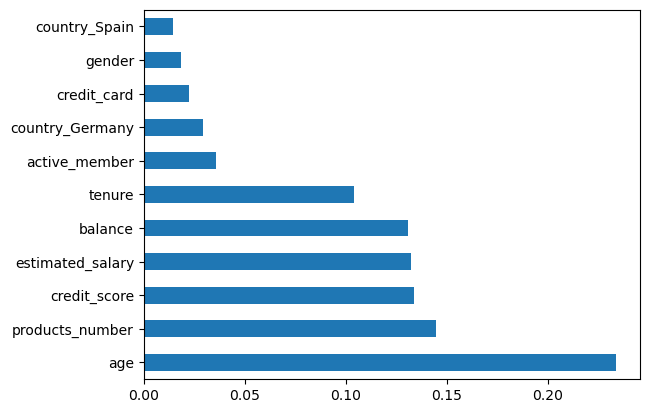

In [97]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()


- We can see that age is responsible for 85% and number of products,estimated_salary,credit_score and balance are responsible for 70% of the predictive model.  

In [98]:
Results = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],'Train Score':[0.71,0.76,0.76],
                        'Test Score':[0.71,0.75,0.76],'Recall':[71,73,74],'Precision':[0.39,0.43,0.44]})
Results_show = Results.sort_values(['Train Score','Test Score','Recall','Precision'],
                                   ascending=[False,False,False,False])
Results_show = Results.set_index('Model')
Results_show

,Train Score,Test Score,Recall,Precision
Model,,,,
Logistic Regression,0.71,0.71,71,0.39
Decision Tree,0.76,0.75,73,0.43
Random Forest,0.76,0.76,74,0.44


- The Random Forest model appears to be the best model among the three. It achieves the highest test score (0.76) and demonstrates a slightly higher recall (74%) and precision (0.44) compared to the Decision Tree model and Logistic Regression. Therefore, the Random Forest model shows better overall performance in terms of accuracy and the ability to correctly identify churn cases.

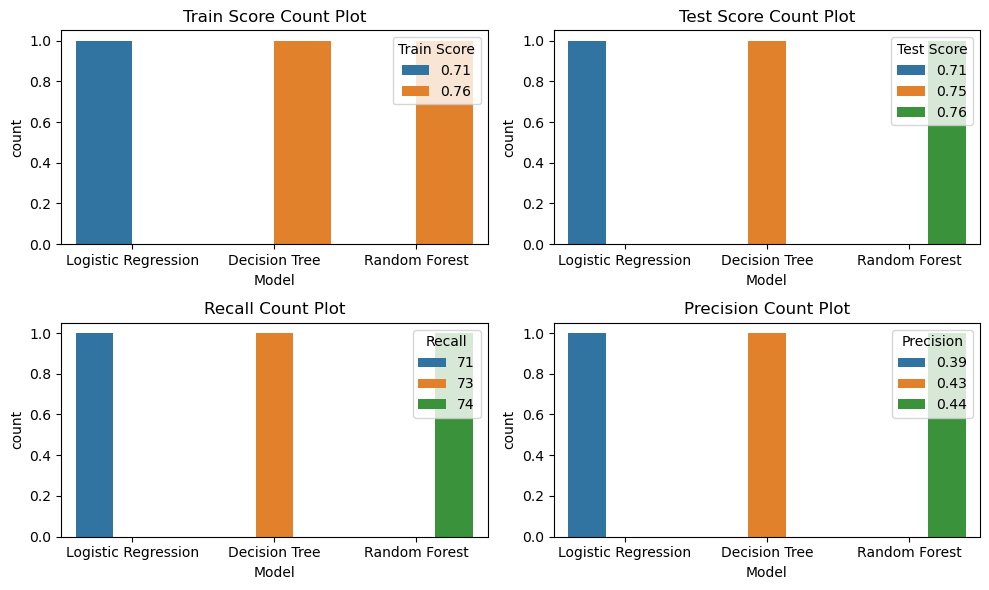

In [99]:

# Create a dataframe with the performance metrics
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Train Score': [0.71, 0.76, 0.76],
    'Test Score': [0.71, 0.75, 0.76],
    'Recall': [71, 73, 74],
    'Precision': [0.39, 0.43, 0.44]
}

df = pd.DataFrame(data)

# Plotting count plots
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Model', hue='Train Score')
plt.title('Train Score Count Plot')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Model', hue='Test Score')
plt.title('Test Score Count Plot')

plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Model', hue='Recall')
plt.title('Recall Count Plot')

plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Model', hue='Precision')
plt.title('Precision Count Plot')

plt.tight_layout()
plt.show()